In [ ]:
Problem: To develop a model for predicting fraudulent transactions for a financial company

In [1]:
pip install dask
# installing dask to perform panda profiling

In [4]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 
import seaborn as sns 
sns.set()

In [2]:
import dask.dataframe as dd

# Load the dataset
df1 = dd.read_csv('Fraud.csv')


In [5]:
df = pd.read_csv('Fraud.csv')
# all activites performed on df only

In [7]:
# Downcast Data Types:
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int8')
df['amount'] = df['amount'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')
df['type'] = df['type'].astype('category')


In [5]:
# View of all columns
pd.set_option('display.max_columns', None) #Setting it to None means that there is no maximum limit on the number of columns to display, and pandas will display all columns.
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
# Column name
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Each feature explaination:

    
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
import pandas as pd
from pandas_profiling import ProfileReport

Profiling using a sample of the data can indeed provide a clear picture of the overall dataset, especially when working with very large datasets. Therefore to get the understanding about the data, we'll do profiling

In [10]:
# Sample a fraction of the data (e.g., 1% of the data)
sample_df = df1.sample(frac=0.01).compute()

# Generate the Pandas Profiling report
profile = ProfileReport(sample_df, title="Pandas Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile

In [ ]:
Insights:

1.isFlaggedFraud:
Constant Value: This column has a constant value of "0".

2.nameOrig:
High Cardinality: Contains 63,625 distinct values.
Uniform Distribution: The values are uniformly distributed.
Unique Values: Each value is unique.

3.nameDest:
High Cardinality: Contains 60,682 distinct values.
Uniform Distribution: The values are uniformly distributed.

4.isFraud:
Highly Imbalanced: The dataset is highly imbalanced with only 1.4% of the transactions being fraudulent (98.6% non-fraudulent).

5.amount:
Highly Skewed: Skewness of 30.165, indicating a highly skewed distribution.

6.oldbalanceOrg:
Zeros: Contains 20,917 zeros (32.9% of the values).

7.newbalanceOrig:
Zeros: Contains 35,926 zeros (56.5% of the values).

8.oldbalanceDest:
Highly Skewed: Skewness of 26.748, indicating a highly skewed distribution.
Zeros: Contains 27,057 zeros (42.5% of the values).

9.newbalanceDest:
Highly Skewed: Skewness of 24.522, indicating a highly skewed distribution.
Zeros: Contains 24,403 zeros (38.4% of the values).

In [15]:
# Check for missing values for the whole data
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## No null values found

In [ ]:
# We can now get the deep insight of whole data by performing EDA

# EDA

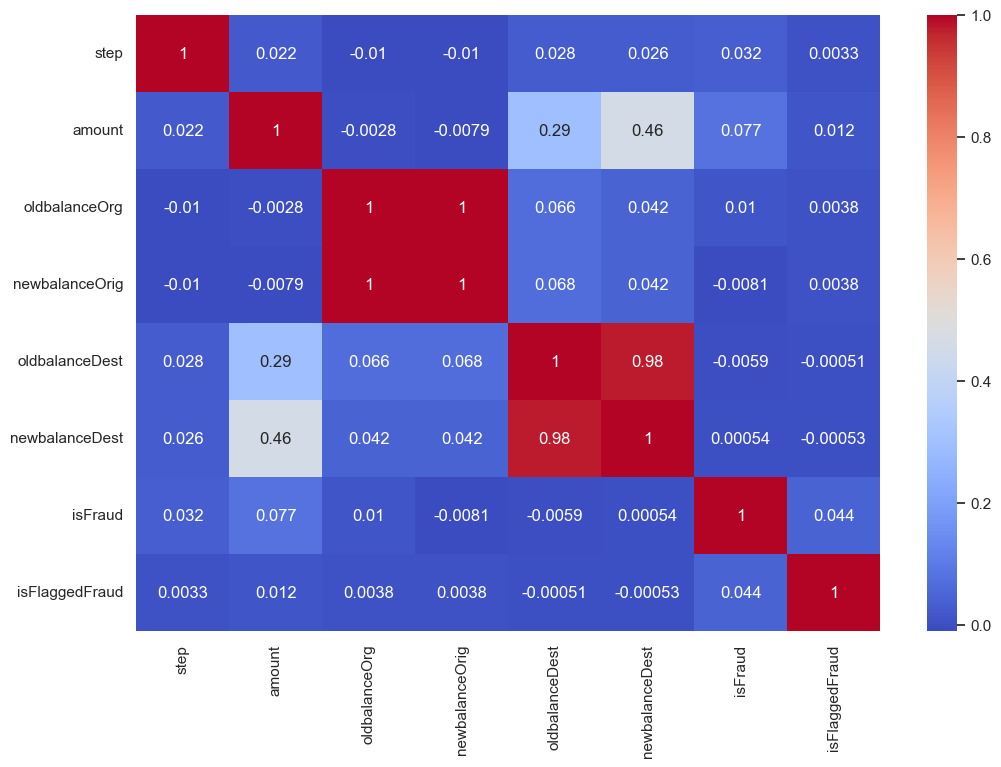

In [9]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation matrix shows a multi-collinearity between oldbalanceDest and newbalanceDest & newbalanceOrig and oldbalanceOrig (correlation coefficient of 0.98, 1). This indicates that these features are highly redundant, and keeping them may not add much value to our model
Highly correlated features can cause multicollinearity in regression models, which can make the model coefficients unstable and harder to interpret

In [21]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
# # Drop the highly correlated feat
df.drop(columns=['oldbalanceDest','oldbalanceOrg'],axis=1,inplace=True)
# # to improve the model performance

In [6]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0


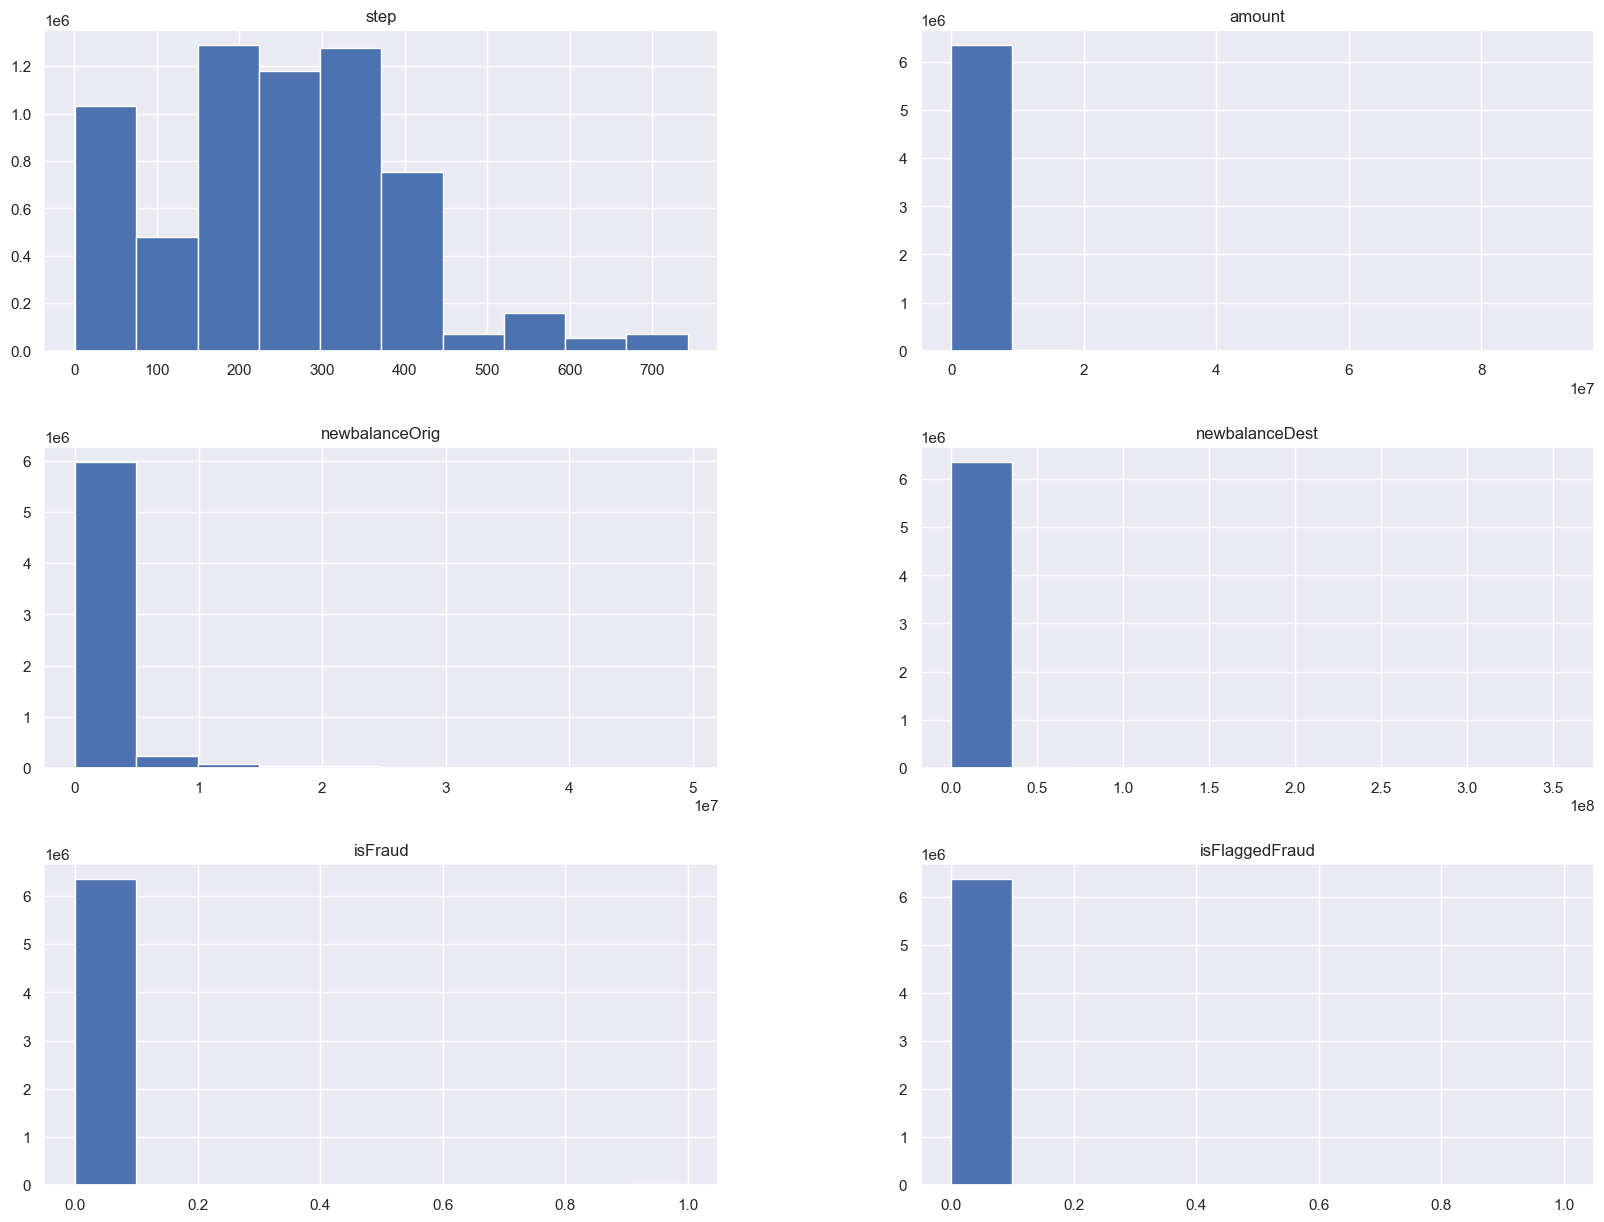

In [24]:
# Data Distribution Visualization
df.hist(figsize=(20, 15))
plt.show()

STEP: The data is spread across the entire range of steps, with more transactions occurring around the middle steps (100 to 300 hours). This indicates a relatively even distribution of transactions over time, with some variation.

AMOUNT: The majority of transaction amounts are clustered towards the lower end of the scale, with a long tail extending towards very high amounts. This indicates a positively skewed distribution with a few large transactions.

newBALANCEORG: Most initial balances are very low, with a few accounts having significantly higher balances. This shows a skewed distribution with many small values and a long tail of larger values. Same for newbalanceDest.

isFraud:The histogram shows a highly imbalanced dataset with the majority of transactions being non-fraudulent. Very few transactions are marked as fraudulent. Same for isFlaggedFraud.

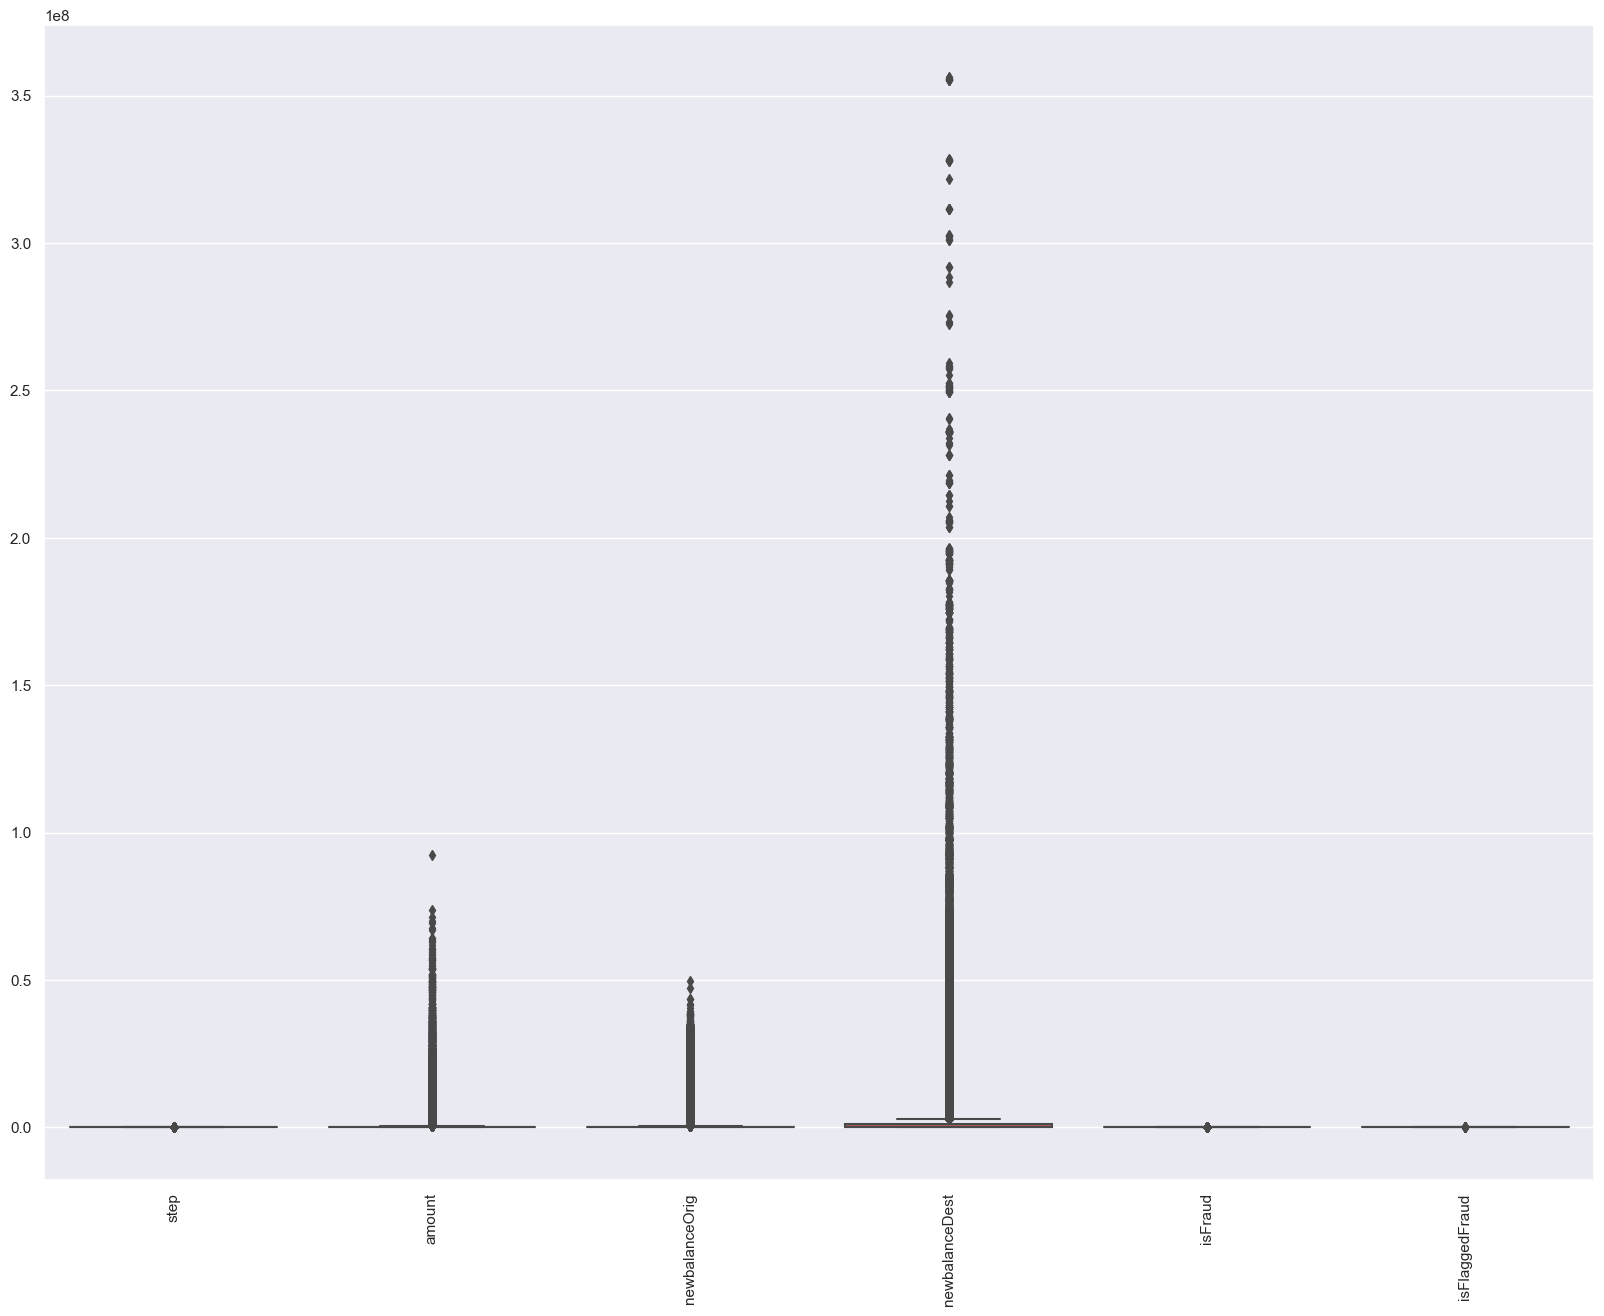

In [25]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

here, we can two problems
1. The data is nt scaled for whcich we can either use minmax scaler, normalization, clipping, log transformation, binning.
2. There are outliers which we can remove as possibility of fraud can be there in such case.

Considering both the issue to resolve, and I dont want to remove outliers and scaling needs to be done. So, clipping preferable.

In [26]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0


In [32]:
df['Amount_Clip'] = df['amount'].clip(lower=0, upper=1000000)
df['NewBalOrig_Clip'] = df['newbalanceOrig'].clip(lower=0, upper=1000000)
df['BalDest_Clip'] = df['newbalanceDest'].clip(lower=0, upper=1000000)

In [34]:
upper_threshold1 = df['amount'].quantile(0.99)
upper_threshold2= df['newbalanceOrig'].quantile(0.99)
upper_threshold3= df['newbalanceDest'].quantile(0.99)
upper_threshold1,upper_threshold2,upper_threshold3

(1615979.4715999917, 16176160.557999993, 13137866.940999895)

Not considering clipping due to lack of clarity which can gain with the discussion with client. Instead of clipping using Robustscaler

In [9]:
import numpy as np
from sklearn.preprocessing import RobustScaler


In [10]:
features_to_scale = ['amount', 'newbalanceOrig', 'newbalanceDest']
data_to_scale = df[features_to_scale].values
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_to_scale)


In [39]:
scaled_data

array([[-0.33293229,  1.11117515, -0.19305662],
       [-0.37376208,  0.13437497, -0.19305662],
       [-0.38237962,  0.        , -0.19305662],
       ...,
       [31.92789862,  0.        ,  5.54473008],
       [ 3.96827426,  0.        , -0.19305662],
       [ 3.96827426,  0.        ,  6.42628001]])

In [11]:
# Replace original columns with scaled data
df[features_to_scale] = scaled_data


In [11]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,-0.332932,C1231006815,1.111175,M1979787155,-0.193057,0,0
1,1,PAYMENT,-0.373762,C1666544295,0.134375,M2044282225,-0.193057,0,0
2,1,TRANSFER,-0.382380,C1305486145,0.000000,C553264065,-0.193057,1,0
3,1,CASH_OUT,-0.382380,C840083671,0.000000,C38997010,-0.193057,1,0
4,1,PAYMENT,-0.323571,C2048537720,0.207169,M1230701703,-0.193057,0,0


Also, from profiling we come to know nameDest, nameOrig has high cardinality, and each value is unique. Clearly, keeping such value would effect the performance. Therefore dropping both the features

In [12]:
df.drop(['nameOrig','nameDest'],inplace=True,axis=1)

In [17]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [18]:
df['step'].unique().size

743

Here,analysis does not require understanding the timing of transactions (e.g., when they occur within the 30-day period), the step column might not add value.

In [13]:
df.drop('step',axis=1,inplace=True)

In [47]:
df.head()

,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,-0.332932,1.111175,-0.193057,0,0
1,PAYMENT,-0.373762,0.134375,-0.193057,0,0
2,TRANSFER,-0.382380,0.000000,-0.193057,1,0
3,CASH_OUT,-0.382380,0.000000,-0.193057,1,0
4,PAYMENT,-0.323571,0.207169,-0.193057,0,0


In [21]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
# Feature encoding

In [14]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'transaction_type' column
df['transaction_type'] = label_encoder.fit_transform(df['type'])
df.head()

,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,transaction_type
0,PAYMENT,-0.332932,1.111175,-0.193057,0,0,3
1,PAYMENT,-0.373762,0.134375,-0.193057,0,0,3
2,TRANSFER,-0.382380,0.000000,-0.193057,1,0,4
3,CASH_OUT,-0.382380,0.000000,-0.193057,1,0,1
4,PAYMENT,-0.323571,0.207169,-0.193057,0,0,3


In [15]:

df.drop('type',axis=1,inplace=True)

In [16]:
df.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,transaction_type
0,-0.332932,1.111175,-0.193057,0,0,3
1,-0.373762,0.134375,-0.193057,0,0,3
2,-0.382380,0.000000,-0.193057,1,0,4
3,-0.382380,0.000000,-0.193057,1,0,1
4,-0.323571,0.207169,-0.193057,0,0,3


([<matplotlib.axis.XTick at 0x1f58f6c0cd0>,
 [Text(0, 0, 'Not Flagged'), Text(1, 0, 'Flagged')])

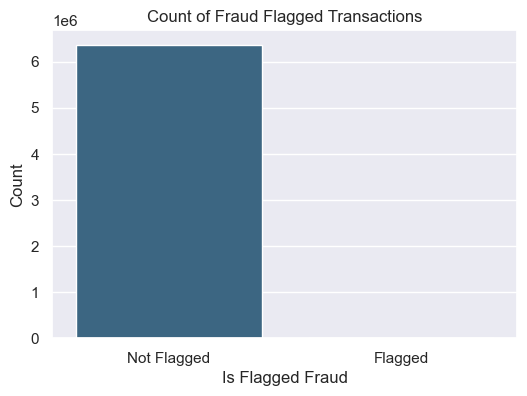

In [14]:

# Create count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='isFlaggedFraud', data=df, palette='viridis')

# Add titles and labels
plt.title('Count of Fraud Flagged Transactions')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Flagged', 'Flagged'])

In [17]:
cor=df['isFlaggedFraud'].corr(df['isFraud'])
cor

0.04410919651381389

this data is completely imbalance, and its impact on target variable is also very low, we may prefer to remove it

<AxesSubplot:xlabel='isFraud', ylabel='count'>

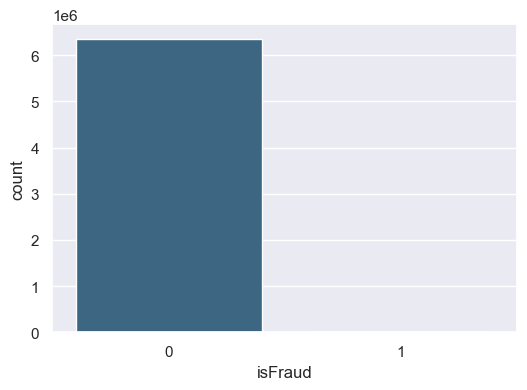

In [17]:

# Create count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df, palette='viridis')

TARGET variablle is imbalanceif would use stratify while model training, depending on the performance we may opt SMOTE further

In [ ]:
# Modelprediction

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
# # Drop non-relevant columns for modeling
# x = df[['isFlaggedFraud', 'Amount_Clip', 'NewBalOrig_Clip','BalDest_Clip','transaction_type']]
# y = df['isFraud']

# # Split the data
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# # Train a Random Forest classifier on the full dataset
# rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)



Facing RAM issue. Therefore, we'll perform downcasting

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   amount            float64
 1   newbalanceOrig    float64
 2   newbalanceDest    float64
 3   isFraud           int64  
 4   isFlaggedFraud    int64  
 5   transaction_type  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 267.0 MB


In [2]:
df.head()

NameError: name 'df' is not defined

In [18]:
# Downcast Data Types:
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int8')
df['amount'] = df['amount'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')
df['transaction_type'] = df['transaction_type'].astype('category')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column            Dtype   
---  ------            -----   
 0   amount            float32 
 1   newbalanceOrig    float32 
 2   newbalanceDest    float32 
 3   isFraud           int64   
 4   isFlaggedFraud    int8    
 5   transaction_type  category
dtypes: category(1), float32(3), int64(1), int8(1)
memory usage: 133.5 MB


In [20]:
# Drop non-relevant columns for modeling
x = df.drop('isFraud',axis=1)
y = df['isFraud']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# Train a Random Forest classifier on the full dataset
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)



In [59]:
rf.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [60]:
y_pred = rf.predict(x_test)


In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [67]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[1270576     305]
 [    703     940]]


True Negatives (TN): 1,270,576 — The classifier correctly predicted the negative class (non-fraud) for 1,270,576 instances.
False Positives (FP): 305 — The classifier incorrectly predicted the positive class (fraud) for 305 instances that were actually non-fraud.
False Negatives (FN): 703 — The classifier incorrectly predicted the negative class (non-fraud) for 703 instances that were actually fraud.
True Positives (TP): 940 — The classifier correctly predicted the positive class (fraud) for 940 instances

In [68]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.76      0.57      0.65      1643

    accuracy                           1.00   1272524
   macro avg       0.88      0.79      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524



We need to improve F1 score and recall score as well. For f1 score, as the target variable is imbalance (though used stratify for that), we can use smote which may help to imporve f1 score.

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)
# Use x_resampled and y_resampled for training your model


In [22]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1, class_weight='balanced')


In [24]:

from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(x_resampled, y_resampled )

LogisticRegression()

In [29]:
# Predictions and evaluation
y_pred = lr.predict(x_test)
print("Logistic Regression with SMOTE data")
print(classification_report(y_test, y_pred))

Logistic Regression with SMOTE data
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270881
           1       0.01      0.65      0.02      1643

    accuracy                           0.92   1272524
   macro avg       0.51      0.79      0.49   1272524
weighted avg       1.00      0.92      0.96   1272524



I stop here due to space issue ( i may perfoem in google collab, but ask to work and attach jupyter notebook ). 

Further steps which i was planning: 
    1. refit to model rf and then check model performance. 
    2. Do hyperparameter tuning then again evaluate the model performace

Variables were selected based on their relevance to the transaction process and potential to indicate fraud:

amount
diffOrig
diffDest
amount_ratio_orig
amount_ratio_dest
type (one-hot encoded)

In [ ]:
# Predictions and evaluation
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

In [1]:
importances = rf.feature_importances_
feature_names = x.columns

# Create a sorted list of feature importances
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Display the top features
for importance, feature in sorted_importances:
    print(f"{feature}: {importance}")

6. Making Sense of the Factors
Evaluate if the key factors make sense:

Amount: Higher transaction amounts may be indicative of fraud.
Balance Differences: Significant changes in balances could signal unusual activity.
Transaction Types: Certain transaction types may be more prone to fraud.

7. Prevention Measures
Implementing infrastructure updates should focus on:

Real-time monitoring: Enhance systems for real-time transaction monitoring and anomaly detection.
Advanced authentication: Implement multi-factor authentication to secure accounts.
Behavioral analytics: Use machine learning to understand and monitor typical customer behavior, flagging deviations.


8. Evaluating Effectiveness of Measures
To determine the effectiveness of implemented measures:

Pre- and Post-Implementation Analysis: Compare fraud rates and detection accuracy before and after implementation.
A/B Testing: Run tests where a subset of transactions uses the new system and compare with the control group.
Customer Feedback: Collect feedback from customers regarding the security and usability of new measures.